In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import time
import random
def print_np(x):
    print ("Type is %s" % (type(x)))
    print ("Shape is %s" % (x.shape,))
#     print ("Values are: \n%s" % (x))
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
import os
import sys
sys.path.append('./')
sys.path.append('./model')
sys.path.append('./cost')
sys.path.append('./constraints')
sys.path.append('./utils')

In [3]:
import UnicycleModel
import UnicycleCost
import UnicycleConstraints
from scipy.integrate import solve_ivp
from PTR import PTR
from Scaling import TrajectoryScaling
from matplotlib.patches import Ellipse

In [4]:
ix = 3
iu = 2
N = 10
tf = 3
delT = tf/N
max_iter = 50

## obstacle setting

In [5]:
def get_H_obs(rx,ry) :
    return np.diag([1/rx,1/ry])
# obstacle
c_list = []
H_list = []
# c1 = [1,2]
# H1 = get_H_obs(0.75,1.5)
# c_list.append(c1)
# H_list.append(H1)
# c2 = [4,3]
# H2 = get_H_obs(0.75,1.5)
# c_list.append(c2)
# H_list.append(H2)
c1 = [1,0.1]
H1 = get_H_obs(0.4,0.4)
c_list.append(c1)
H_list.append(H1)

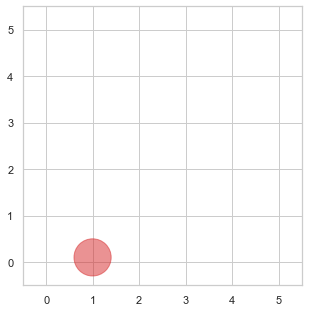

In [6]:
plt.figure(figsize=(5,8))
ax=plt.gca()
for ce,H in zip(c_list,H_list) :
    rx = 1/H[0,0]
    ry = 1/H[1,1]
    circle1 = Ellipse((ce[0],ce[1]),rx*2,ry*2,color='tab:red',alpha=0.5,fill=True)
    ax.add_patch(circle1)
plt.axis([-0.5, 5.5, -0.5, 5.5])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)

In [10]:
xi = np.zeros(3)
xi[0] = 0.0
xi[1] = 0.0 
xi[2] = 0

xf = np.zeros(3)
xf[0] = 2.0
xf[1] = 0.0
xf[2] = 0

myModel = UnicycleModel.unicycle('Hello',ix,iu,'numeric_central')
myCost = UnicycleCost.unicycle('Hello',ix,iu,N)
myConst = UnicycleConstraints.UnicycleConstraints('Hello',ix,iu)
myConst.set_obstacle(c_list,H_list)

x0 = np.zeros((N+1,ix))
for i in range(N+1) :
    x0[i] = (N-i)/N * xi + i/N * xf
# u0 = np.random.rand(N,iu)
u0 = np.zeros((N+1,iu))

# Initial setting

## initial trajectory x,u

In [11]:
i1 = PTR('unicycle',N,tf,max_iter,myModel,myCost,myConst,type_discretization="foh",
          w_c=1,w_vc=1e3,w_tr=1e0,tol_vc=1e-6,tol_tr=1e-3)
x,u,xbar,ubar,total_num_iter,flag_boundary,l,l_vc,l_tr = i1.run(x0,u0,xi,xf)


prop_n - prop 0.0
iteration   total_cost        cost        ||vc||     ||tr||       reduction   w_tr        bounary
1           609.743           4.734       0.6         5.01        390         1.000       0(0.3)
prop_n - prop -2.220446049250313e-16
2           18.161            10.455      3.35e-11    7.71        592         1.000       0(0.11)
prop_n - prop 1.0875994440988357e-11
3           10.355            10.101      8.98e-11    0.254       7.81        1.000       0(0.00213)
prop_n - prop 3.0904670641172804e-13
4           10.066            9.985       5.82e-11    0.0814      0.289       1.000       1(9.03e-05)
prop_n - prop -5.595261965340645e-12
5           9.909             9.854       1.59e-11    0.0555      0.157       1.000       1(0.000142)
prop_n - prop -9.437626813943792e-12
6           9.813             9.784       4.34e-11    0.0294      0.0963      1.000       1(9.19e-05)
prop_n - prop -1.215147929923676e-11
7           9.765             9.753       1.45e-11    0.0126

Text(0, 0.5, 'Y (m)')

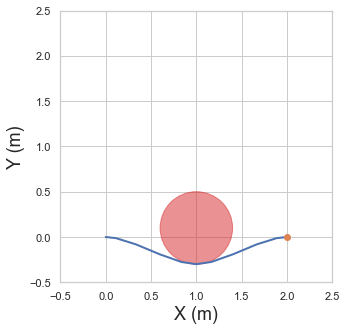

In [12]:
fS = 18
plt.figure(figsize=(5,5))
ax=plt.gca()
for ce,H in zip(c_list,H_list) :
    rx = 1/H[0,0]
    ry = 1/H[1,1]
    circle1 = Ellipse((ce[0],ce[1]),rx*2,ry*2,color='tab:red',alpha=0.5,fill=True)
    ax.add_patch(circle1)
plt.plot(x[:,0], x[:,1], linewidth=2.0)
plt.plot(xf[0],xf[1],"o",label='goal')
plt.gca().set_aspect('equal', adjustable='box')
plt.axis([-0.5, 2.5, -0.5, 2.5])
plt.xlabel('X (m)', fontsize = fS)
plt.ylabel('Y (m)', fontsize = fS)

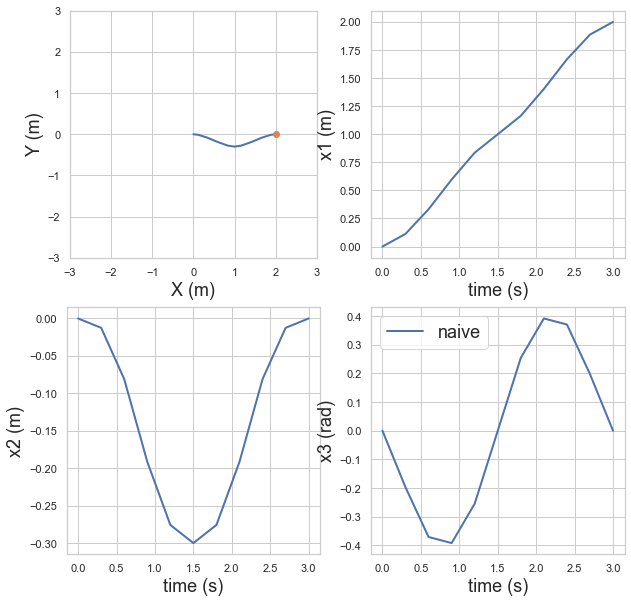

<Figure size 432x288 with 0 Axes>

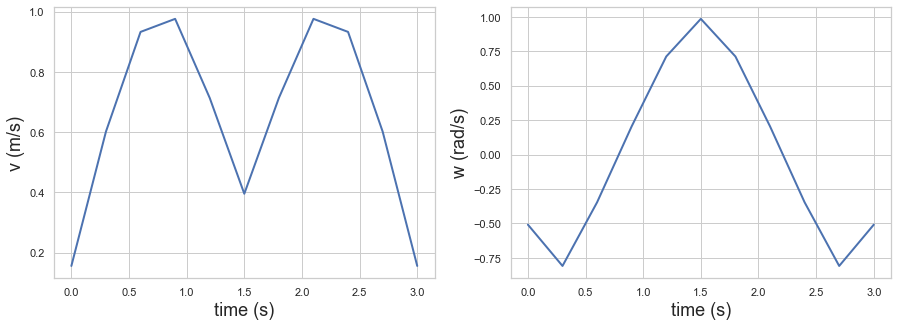

In [14]:
plt.figure(figsize=(10,10))
t_index = np.array(range(N+1))*delT
plt.subplot(221)
plt.plot(x[:,0], x[:,1], linewidth=2.0)
plt.plot(xf[0],xf[1],"o",label='goal')
plt.gca().set_aspect('equal', adjustable='box')
plt.axis([-3, 3, -3, 3])
plt.xlabel('X (m)', fontsize = fS)
plt.ylabel('Y (m)', fontsize = fS)
plt.subplot(222)
plt.plot(t_index, x[:,0], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x1 (m)', fontsize = fS)
plt.subplot(223)
plt.plot(t_index, x[:,1], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x2 (m)', fontsize = fS)
plt.subplot(224)
plt.plot(t_index, x[:,2], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x3 (rad)', fontsize = fS)
plt.legend(fontsize=fS)
plt.show()

plt.figure()
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(t_index, u[:,0], linewidth=2.0)
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('v (m/s)', fontsize = fS)
plt.subplot(122)
plt.plot(t_index, u[:,1], linewidth=2.0)
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('w (rad/s)', fontsize = fS)
plt.show()

In [ ]:
u[:N,0]

# linear model

In [ ]:
print_np(x)
print_np(u)

In [ ]:
A,B,s,z,vc = i1.get_model()
print_np(A)
print_np(B)
print_np(s)
print_np(z)
print_np(vc)
C = s+z+vc

# Scaling

In [ ]:
Sx,iSx,sx,Su,iSu,su = compute_scaling(x,u)

# Feasibility of a quadratic funnel

In [ ]:
from cvxpy.atoms.log_det import log_det
a1 = np.array([[-1],[0],[0]])
b1 = 3
a2 = np.array([[0],[-1],[0]])
b2 = 3
a3 = np.array([[0],[0],[1]])
b3 = np.pi
a4 = np.array([[0],[0],[-1]])
b4 = np.pi

In [ ]:
Q_max_list = []
for i in range(N+1) :
    Z = cp.Variable((ix,ix), PSD=True)
    constraints = []
    constraints.append(cp.norm((Sx@Z@Sx)@a1,2) + a1.T@x[i] <= b1)
    constraints.append(cp.norm((Sx@Z@Sx)@a2,2) + a2.T@x[i] <= b2)
    constraints.append(cp.norm((Sx@Z@Sx)@a3,2) + a3.T@x[i] <= b3)
    constraints.append(cp.norm((Sx@Z@Sx)@a4,2) + a4.T@x[i] <= b4)
    constraints.append((Sx@Z@Sx) << 10*np.eye(ix))
    prob = cp.Problem(cp.Minimize(-log_det((Sx@Z@Sx))),constraints)
    prob.solve()
    Z_val = Sx@Z.value@Sx 
    Q_max_list.append(Z_val@Z_val)
#     Q_max_list.append(np.diag(Z.value.data[0])@np.diag(Z.value.data[0]))

In [ ]:
Q_max_list

## input

In [ ]:
a1 = np.array([[1],[0]])
b1 = 4
a2 = np.array([[-1],[0]])
b2 = 1
a3 = np.array([[0],[1]])
b3 = 3
a4 = np.array([[0],[-1]])
b4 = 3

In [ ]:
R_max_list = []
for i in range(N) :
    Z = cp.Variable((iu,iu), PSD=True)
    constraints = []
    constraints.append(cp.norm((Su@Z@Su)@a1,2) + a1.T@u[i] <= b1)
    constraints.append(cp.norm((Su@Z@Su)@a2,2) + a2.T@u[i] <= b2)
    constraints.append(cp.norm((Su@Z@Su)@a3,2) + a3.T@u[i] <= b3)
    constraints.append(cp.norm((Su@Z@Su)@a4,2) + a4.T@u[i] <= b4)
#     constraints.append(0 << Z)
    constraints.append((Su@Z@Su) << 100*np.eye(iu))
    prob = cp.Problem(cp.Minimize(-log_det((Su@Z@Su))),constraints)
    prob.solve()
    Z_val = Su@Z.value@Su
    R_max_list.append(Z_val@Z_val)

# LMI

In [ ]:
rho = 0.9
rQ = cp.Variable((N+1,1),nonneg=True)
Q_list = []
Y_list = []
for i in range(N) :
    Q_list.append(cp.Variable((ix,ix), PSD=True))
#     Q_list.append(cp.Variable((ix,ix), diag=True))
    Y_list.append(cp.Variable((iu,ix)))
Q_list.append(cp.Variable((ix,ix), PSD=True))

In [ ]:
constraints = []
for i in range(N) :
    # scalining
    Qi = Sx@Q_list[i]@Sx
    Qi_next = Sx@Q_list[i+1]@Sx
    Yi = Su@Y_list[i]@Sx
    # stability
    tmp1 = cp.hstack((rho*Qi,Qi@A[i].T + Yi.T@B[i].T))
    tmp2 = cp.hstack((A[i]@Qi+B[i]@Yi,Qi_next))
    left1 = cp.vstack((tmp1,tmp2))
#     constraints.append(Qi >> rQ[i])
    constraints.append(Qi >> 0)
    constraints.append(left1 >> 0)
    
    # feasibility - input
#     tmp3 = cp.hstack((Qi,Yi.T))
#     tmp4 = cp.hstack((Yi,R_max_list[i]))
#     left2 = cp.vstack((tmp3,tmp4))
#     constraints.append(left2 >> 0)
    # feasibility - state
    constraints.append(Qi << Q_max_list[i])
Qi = Sx@Q_list[-1]@Sx
constraints.append(Qi >> 0)
constraints.append(Qi << Q_max_list[-1])

In [ ]:
# prob = cp.Problem(cp.Minimize(1),constraints)
# prob = cp.Problem(cp.Minimize(-cp.sum(rQ)),constraints)
prob = cp.Problem(cp.Minimize(-log_det(Sx@Q_list[0]@Sx)),constraints)
# prob = cp.Problem(cp.Minimize(-log_det(Sx@Q_list[0]@Sx)-cp.sum(rQ)),constraints)
prob.solve()
print(prob.status)

In [ ]:
prob.value

In [ ]:
Q_final = []
Y_final = []
for i in range(N) :
    Q_final.append(Sx@Q_list[i].value@Sx)
    Y_final.append(Su@Y_list[i].value@Sx)
Q_final.append(Sx@Q_list[0].value@Sx)

In [ ]:
K_list = []
for i in range(N) :
    K = Y_final[i]@np.linalg.inv(Q_final[i])
    K_list.append(K)
K_list = np.array(K_list)
print(np.sum(np.linalg.norm(K_list,2,2),0))

In [ ]:
# # LQR K
# def get_K(A,B,Q,R,Q_final,N,ix,iu) :
#     # Q = np.eye(ix)*1e2
#     # R = np.eye(iu)
#     P = np.zeros((N+1,ix,ix))
#     K = np.zeros((N,iu,ix))
#     P[N] = Q_final
#     for i in range(N-1,-1,-1) :
#         K[i] = np.linalg.inv(B[i].T@P[i+1]@B[i]+R)@B[i].T@P[i+1]@A[i]
#         P[i] = (A[i]-B[i]@K[i]).T@P[i+1]@(A[i]-B[i]@K[i])+K[i].T@R@K[i]+Q
#     return -K
# Q = 2*np.eye(ix)
# R = np.eye(iu)
# Q_final = 2*np.eye(ix)
# K_list = get_K(A,B,Q,R,Q_final,N,ix,iu)
# print(np.sum(np.linalg.norm(K_list,2,2),0))

# rollout

In [ ]:
N_sample = 20
xdata = np.zeros((N_sample,N+1,ix))
udata = np.zeros((N_sample,N+1,iu))
std_position = [0.3,0.3,0.0]

In [ ]:
for j in range(N_sample) :
    xdata[j,0] = x[0] + np.random.randn(ix) * np.array(std_position)
    for i in range(N) :
        udata[j,i] = u[i]+K_list[i]@(xdata[j,i]-x[i])
        xdata[j,i+1] = A[i]@xdata[j,i]+B[i]@udata[j,i] + C[i]
        # xdata[j,i+1] = xbar[i+1] + np.random.randn(ix) * np.array(noise_std) # injecting noise

In [ ]:
fS = 18
plt.figure(figsize=(5,5))
for i in range(N_sample) :
    plt.plot(xdata[i,:,0], xdata[i,:,1], linewidth=1.0)
plt.plot(x[:,0], x[:,1], linewidth=2.0)
plt.plot(xf[0],xf[1],"o",label='goal')
plt.gca().set_aspect('equal', adjustable='box')
plt.axis([-3, 3, -3, 3])
plt.xlabel('X (m)', fontsize = fS)
plt.ylabel('Y (m)', fontsize = fS)

# plot ellipsoidal sets

In [ ]:
(rho ** 2)

In [ ]:
ellipse_list = []
theta = np.linspace(0,2*np.pi,30)
c = 1
circle_x = c * np.cos(theta) 
circle_y = c * np.sin(theta) 
circle = np.vstack((circle_x,circle_y,np.zeros_like(circle_x)))
for i in range(N+1) :
    Q_tmp = Q_final[i]
    L = np.linalg.cholesky(np.linalg.inv(Q_tmp))
    c = 1 * (rho ** i)
    circle_x = c * np.cos(theta) 
    circle_y = c * np.sin(theta) 
    circle = np.vstack((circle_x,circle_y,np.zeros_like(circle_x))) 
    ellipse = np.linalg.inv(L.T)@circle
    ellipse_list.append(ellipse)

In [ ]:
fS = 18
plt.figure(figsize=(10,10))
for i in range(N+1) :
    plt.plot(ellipse_list[i][0,:]+x[i,0],ellipse_list[i][1,:]+x[i,1], linewidth=2.0,color='tab:grey')
plt.plot(x[:,0], x[:,1], linewidth=2.0)
plt.plot(xf[0],xf[1],"o",label='goal')
plt.gca().set_aspect('equal', adjustable='box')
plt.axis([-5, 3, -5, 3])
plt.xlabel('X (m)', fontsize = fS)
plt.ylabel('Y (m)', fontsize = fS)

# Lipschitz constant estimation

## sample generation at t=0

In [ ]:
x_sample = []
u_sample = []
num_sample = 100
idx = 0
for i in range(num_sample) :
    z = np.random.randn(ix)
    z = z / np.linalg.norm(z)
    x_s = x[idx] + Q_final[idx]@z
    u_s = u[idx] + K_list[idx]@(x_s-x[idx])
    x_sample.append(x_s)
    u_sample.append(u_s)
x_sample = np.array(x_sample)
u_sample = np.array(u_sample)
print_np(x_sample)

## next state

In [ ]:
from forward import forward_one_step

In [ ]:
x_next = forward_one_step(myModel,x_sample,u_sample)
x_next_from_linear = np.transpose(A[idx]@x_sample.T + B[idx]@u_sample.T)

In [ ]:
# fS = 18
# plt.figure(figsize=(10,10))
# plt.plot(ellipse_list[1][0,:]+x[0,0],ellipse_list[1][1,:]+x[0,1], linewidth=2.0,color='tab:grey')
# plt.plot(x_next[:,0],x_next[:,1],'o')
# plt.plot(x[:,0], x[:,1], linewidth=2.0)
# plt.plot(xf[0],xf[1],"o",label='goal')
# plt.gca().set_aspect('equal', adjustable='box')
# plt.axis([-5, 3, -5, 3])
# plt.xlabel('X (m)', fontsize = fS)
# plt.ylabel('Y (m)', fontsize = fS)

## model construction

In [ ]:
print_np(C)

In [ ]:
C_o = np.array([[0,0,0],[0,0,1]])
D_o = np.array([[1,0],[0,0]])
E_o = np.array([[1,0],[0,1],[0,0]])
C_f = np.tile(C_o,iq) 
D_f = np.tile(D_o,iq) 
E_f = np.repeat(E_o,iq,axis=1)

## inner optimization

In [ ]:
print_np(x_next)

In [ ]:
idx_sample = 0
Delta = cp.Variable((iq*iq,1))

In [ ]:
A_cl = 

In [ ]:
idx_sample = 0
Delta = cp.Variable((iq*iq,1))
constraint = [x_next[idx_sample] - x_next_from_linear[idx_sample] == E_f@Delta@]

# temp

In [ ]:
theta = np.linspace(0,2*np.pi,30)
c = 1
circle_x = c * np.cos(theta) 
circle_y = c * np.sin(theta) 
circle = np.vstack((circle_x,circle_y))
Q_tmp = np.diag([100,1])
L = np.linalg.cholesky(np.linalg.inv(Q_tmp))
ellipse = np.linalg.inv(L.T)@circle

In [ ]:
plt.plot(ellipse[0,:],ellipse[1,:], linewidth=2.0,color='tab:grey')
plt.gca().set_aspect('equal', adjustable='box')

In [ ]:
4*0.073 / (3*1e-3*1000*9.81)

In [ ]:
101325*100*0.0001

In [ ]:
10^(-4)

In [ ]:
1/((100-32)*5/9 +273)*(28*0.001)/(8.314)*101325*1.5

In [ ]:
101325*1.5*100*0.0001

In [ ]:
-1.65 * (100*0.0001)*0.1*8.314/(28*0.001)*((100-32)*5/9+273)*np.log(1/1.5)

In [ ]:
61.74+101325*-0.5*(100*0.0001)

In [ ]:
61.74+101325*(100*0.0001)*(0.1-0.15)